# Online store ICE project.

We are working for an online store that sells video games worldwide. We are planning an advertising campaign for 2017, and for that, we are ready to analyze a dataset from  The Entertainment Software Rating Board (ESRB).


The project aims to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

Step 1: Open the data file and study the general information.

Step 2: Prepare the data.

Step 3: Analyze the data.

Step 4: Create a user profile for each region.

Step 5: Test the hypotheses.

Step 6: Write a general conclusion.

# Step 1: Open the data file and study the general information.

Let's import the tools that we will use in this project.

In [528]:
pip install -U sidetable

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: sidetable in /home/jovyan/.local/lib/python3.7/site-packages (0.9.0)
Note: you may need to restart the kernel to use updated packages.


In [529]:
import pandas as pd
import sidetable
import numpy as np
import warnings

Let's read the data.

In [530]:
data = pd.read_csv('/datasets/games.csv')

Let's study the data at first glance.

In [531]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We can see two missing values in the name and the genre.
Also, we have missing values in rating, user_score, and critic score.

In [532]:
data.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


With the Sitetable library, we can see the missing values better in the info method.

Now we can see many missing values in critic score, rating, and user score.
Half of those columns are missing.

In [533]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [534]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [535]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2341,Call of Duty: World at War,DS,2008.0,Shooter,0.56,0.25,0.00,0.08,75.0,7.8,T
9824,NPPL: Championship Paintball 2009,X360,2008.0,Shooter,0.10,0.01,0.00,0.01,44.0,7.3,E10+
7303,Transformers: Dark of the Moon,3DS,2011.0,Action,0.16,0.04,0.00,0.02,NaN,NaN,NaN
2362,NBA 2K6,PS2,2005.0,Action,0.43,0.34,0.00,0.11,84.0,8.3,E
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.00,0.03,71.0,6.5,E10+
14116,Sega Arcade Gallery,GBA,2003.0,Misc,0.03,0.01,0.00,0.00,70.0,tbd,E
3538,Disney Universe,X360,2011.0,Action,0.37,0.14,0.00,0.05,66.0,5.3,E10+
1773,Dragon Quest I & II,SNES,1993.0,Role-Playing,0.00,0.00,1.15,0.00,NaN,NaN,NaN
8836,Pokémon: Johto Photo Finish: Game Boy Advance ...,GBA,2004.0,Misc,0.11,0.04,0.00,0.00,NaN,NaN,NaN
9696,NHL 2002,GBA,2002.0,Sports,0.09,0.03,0.00,0.00,NaN,tbd,E


When we look at the first five rows of data, it seems fine.
When we look at the last rows, it doesn't look good.
If we look at a sample from the data, we can see a lot of missing values, and 0's on our data.

Let's look at the describe method to see what scale our score measures.

In [536]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Critic score is measured on a scale of zero to 100 scale.
When we look closely at the described method, we dont see user_score.
This is because, in default, the describe method includes only numeric parameters.
What is means is that the user score is not numeric.
Let's use describe method and include objects.

In [537]:
data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


From the describe method that includes objects, we can see that we have one platform, 12 genres, and tons of games—almost every row (name column is unique.)
for the user_score, we have nine unique scores, but the most common one is "TBD" (to be determined)
That is why user_score is a categorical column.
We can see that the most common game is "Need for speed".
the most common platform is "PS2."
The most common genre is "Action."

In [538]:
data.stb.freq(['Platform'], style=True, cum_cols=False)

,Platform,count,percent
0,PS2,"2,161",12.93%
1,DS,"2,151",12.87%
2,PS3,"1,331",7.96%
3,Wii,"1,320",7.90%
4,X360,"1,262",7.55%
5,PSP,"1,209",7.23%
6,PS,"1,197",7.16%
7,PC,974,5.83%
8,XB,824,4.93%
9,GBA,822,4.92%


We can see that ps2 and DS are the most used platforms.

In [539]:
data.stb.freq(['Genre'], style=True, cum_cols=False)

,Genre,count,percent
0,Action,"3,369",20.16%
1,Sports,"2,348",14.05%
2,Misc,"1,750",10.47%
3,Role-Playing,"1,498",8.96%
4,Shooter,"1,323",7.92%
5,Adventure,"1,303",7.80%
6,Racing,"1,249",7.47%
7,Platform,888,5.31%
8,Simulation,873,5.22%
9,Fighting,849,5.08%


We can see that the most popular genre are Action, Sports, and Misc.

In [540]:
data.stb.freq(['Rating'], style=True, cum_cols=False)

,Rating,count,percent
0,E,"3,990",40.10%
1,T,"2,961",29.76%
2,M,"1,563",15.71%
3,E10+,"1,420",14.27%
4,EC,8,0.08%
5,RP,3,0.03%
6,K-A,3,0.03%
7,AO,1,0.01%


We can see that the most dominant Rating in the data is E, T, and M.
The other Rating is less than 1%.

Let's see the top 5 games by sals in north America.

In [541]:
data.nlargest(5,['NA_sales'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


For North American sales, the top games are Wii Sports, Super Mario Bros, Duck Hunt, Tetris, and Mario Kart Wii.

In [542]:
data.nlargest(5, ['EU_sales'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E


For Europe sales, the top games are Wii Sports, Mario Kart Wii, Nintendogs, Wii Sports Resort, Brain Age: Train Your Brain in Minutes a Day.

In [543]:
data.nlargest(5, ['JP_sales'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN


The top games for Japan are Pokemon Red/Pokemon Blue, Pokemon Gold/Pokemon Silver, Super Mario Bros., New Super Mario Bros., Pokemon Diamond/Pokemon Pearl.

# Step 2. Prepare the data

In [544]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Let's change all the headings of the columns to lower case.


In [545]:
data.columns = data.columns.str.lower()

In [546]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [547]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Now all columns are lowercase.


In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [549]:
data[data.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


With the missing values in the Name and genre column, we can remove them because these are just two rows, and there is no significant amount of data in other columns in this row.

In [550]:
data = data.dropna(subset=['name'])

In [551]:
data[data.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [552]:
data[data.genre.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


we need to look at the missing values that we have once again.

In [553]:
data.stb.missing()

,missing,total,percent
critic_score,8576,16713,51.313349
rating,6764,16713,40.471489
user_score,6699,16713,40.082570
year_of_release,269,16713,1.609526
name,0,16713,0.000000
platform,0,16713,0.000000
genre,0,16713,0.000000
na_sales,0,16713,0.000000
eu_sales,0,16713,0.000000
jp_sales,0,16713,0.000000


year_of_release has 269 missing rows. From a logical point of view, we can say that the year of release is influenced by the time the platform release a specific game.
Let's fill the missing values in this column by the median year_of_release of the platform.

In [555]:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby(['platform'])['year_of_release'].transform('median'))
warnings.filterwarnings("ignore")

In [556]:
data.stb.missing()

,missing,total,percent
critic_score,8576,16713,51.313349
rating,6764,16713,40.471489
user_score,6699,16713,40.082570
name,0,16713,0.000000
platform,0,16713,0.000000
year_of_release,0,16713,0.000000
genre,0,16713,0.000000
na_sales,0,16713,0.000000
eu_sales,0,16713,0.000000
jp_sales,0,16713,0.000000


There are no missing values in the year of release.

In [557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's change the data type of year of release columns to an integer data type.

In [558]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [560]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [561]:
data.stb.missing()

,missing,total,percent
critic_score,8576,16713,51.313349
rating,6764,16713,40.471489
user_score,6699,16713,40.082570
name,0,16713,0.000000
platform,0,16713,0.000000
year_of_release,0,16713,0.000000
genre,0,16713,0.000000
na_sales,0,16713,0.000000
eu_sales,0,16713,0.000000
jp_sales,0,16713,0.000000


Let's focus on the TBD value in the user_score column. If the TBD means "to be determined," that means that maybe it means that this is a new game and the user still gives this game a score. So if tbd means new games, the year f release needs to be high relative to the data at hand. Let's look at the TBD rows and year of release column.

In [562]:
data[data.user_score == 'tbd']['year_of_release'].value_counts()

2009    422
2008    338
2010    332
2011    217
2002    192
2007    192
2005    125
2006    124
2004    111
2003    102
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     17
1999      8
1998      1
1997      1
Name: year_of_release, dtype: int64

We were wrong in our small assumption, and there are many different years with tbd values. So we cannot use this data in our analysis. And in the next step, when we need to calculate the user_score, we will replace this with a numeric number of -1.

In [563]:
data.stb.freq(['user_score'])

,user_score,count,percent,cumulative_count,cumulative_percent
0,tbd,2424,24.206111,2424,24.206111
1,7.8,324,3.235470,2748,27.441582
2,8,290,2.895946,3038,30.337527
3,8.2,282,2.816058,3320,33.153585
4,8.3,254,2.536449,3574,35.690034
...,...,...,...,...,...
91,0.5,2,0.019972,10008,99.940084
92,0.3,2,0.019972,10010,99.960056
93,0.2,2,0.019972,10012,99.980028
94,9.7,1,0.009986,10013,99.990014


In [564]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [565]:
data['user_score'] = data['user_score'].replace(['tbd'], -1)

In [566]:
data[data.user_score == 'tbd'].value_counts()

Series([], dtype: int64)

In [567]:
data.describe(include='object')

,name,platform,genre,user_score,rating
count,16713,16713,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,-1,E
freq,12,2161,3369,2424,3990


In [568]:
data.stb.freq(['user_score'])

,user_score,count,percent,cumulative_count,cumulative_percent
0,-1,2424,24.206111,2424,24.206111
1,7.8,324,3.235470,2748,27.441582
2,8,290,2.895946,3038,30.337527
3,8.2,282,2.816058,3320,33.153585
4,8.3,254,2.536449,3574,35.690034
...,...,...,...,...,...
91,0.5,2,0.019972,10008,99.940084
92,0.3,2,0.019972,10010,99.960056
93,0.2,2,0.019972,10012,99.980028
94,9.7,1,0.009986,10013,99.990014


In [569]:
data['user_score'].value_counts()

-1     2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [570]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


there is no TBD in the data now

Let's Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [571]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [572]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


 With the missing values in critic_score, user_score, Rating, there are so many missing values in those columns.
Maybe those are new games; we also have to consider that not everybody leaves a review and rate a game after he plays it, even if he enjoys it.
We also can't just remove these rows from the data because it is almost half of the data.

From a logical point of view, there is a relationship between those three columns.
We can assume that the critic score is professional people criticizing the game, which comes before user_score(the gamer who scores the game).
There is an almost identical amount of missing values with Rating and user score, but Rating he's a little bit less missing values, and we can assume that it comes after the user_score score a game.
Let's fill the values of those columns by the median of each other.


In [573]:
data.stb.missing()

,missing,total,percent
critic_score,8576,16713,51.313349
rating,6764,16713,40.471489
user_score,6699,16713,40.082570
name,0,16713,0.000000
platform,0,16713,0.000000
year_of_release,0,16713,0.000000
genre,0,16713,0.000000
na_sales,0,16713,0.000000
eu_sales,0,16713,0.000000
jp_sales,0,16713,0.000000


In [574]:
data['user_score'] = data['user_score'].fillna(data.groupby(['rating', 'critic_score'])['user_score'].transform('median'))

In [575]:
data.stb.missing()

,missing,total,percent
critic_score,8576,16713,51.313349
rating,6764,16713,40.471489
user_score,6671,16713,39.915036
name,0,16713,0.000000
platform,0,16713,0.000000
year_of_release,0,16713,0.000000
genre,0,16713,0.000000
na_sales,0,16713,0.000000
eu_sales,0,16713,0.000000
jp_sales,0,16713,0.000000


In [576]:
data['critic_score'] = data['critic_score'].fillna(data.groupby(['user_score', 'rating'])['critic_score'].transform('median'))

In [577]:
data.stb.missing()

,missing,total,percent
rating,6764,16713,40.471489
critic_score,6753,16713,40.405672
user_score,6671,16713,39.915036
name,0,16713,0.000000
platform,0,16713,0.000000
year_of_release,0,16713,0.000000
genre,0,16713,0.000000
na_sales,0,16713,0.000000
eu_sales,0,16713,0.000000
jp_sales,0,16713,0.000000


We lower the number of missing values in critic_score by 10%. But there are still a large number of missing values.

Maybe we can use platforms as an anchor to fill those columns by the median Rating, critic_score, user_score of each platform.

In [578]:
data['critic_score'] = data['critic_score'].fillna(data.groupby(['platform'])['critic_score'].transform('median'))

In [579]:
data.stb.missing()

,missing,total,percent
rating,6764,16713,40.471489
user_score,6671,16713,39.915036
critic_score,1118,16713,6.689403
name,0,16713,0.000000
platform,0,16713,0.000000
year_of_release,0,16713,0.000000
genre,0,16713,0.000000
na_sales,0,16713,0.000000
eu_sales,0,16713,0.000000
jp_sales,0,16713,0.000000


In [580]:
data['user_score'] = data['user_score'].fillna(data.groupby(['platform'])['user_score'].transform('median'))

In [581]:
data.stb.missing()

,missing,total,percent
rating,6764,16713,40.471489
critic_score,1118,16713,6.689403
user_score,1118,16713,6.689403
name,0,16713,0.000000
platform,0,16713,0.000000
year_of_release,0,16713,0.000000
genre,0,16713,0.000000
na_sales,0,16713,0.000000
eu_sales,0,16713,0.000000
jp_sales,0,16713,0.000000


More than 5% of the total column of critic_score and user_score is still missing, so we cannot drop those values. Let's fill those values with a -2.

In [582]:
data['critic_score'] = data['critic_score'].fillna(-2)

In [583]:
data.stb.freq(['critic_score'])

,critic_score,count,percent,cumulative_count,cumulative_percent
0,62.0,2314,13.845509,2314,13.845509
1,73.0,1362,8.149345,3676,21.994854
2,69.0,1125,6.731287,4801,28.726141
3,-2.0,1118,6.689403,5919,35.415545
4,71.0,983,5.881649,6902,41.297194
...,...,...,...,...,...
109,41.5,1,0.005983,16709,99.976067
110,22.0,1,0.005983,16710,99.982050
111,21.0,1,0.005983,16711,99.988033
112,17.0,1,0.005983,16712,99.994017


In [584]:
data['user_score'] = data['user_score'].fillna(-2) 

In [585]:
data.stb.freq(['user_score'])

,user_score,count,percent,cumulative_count,cumulative_percent
0,-1.0,3601,21.546102,3601,21.546102
1,-2,1118,6.689403,4719,28.235505
2,7.8,983,5.881649,5702,34.117154
3,7.7,680,4.068689,6382,38.185843
4,7.1,665,3.978939,7047,42.164782
...,...,...,...,...,...
119,5.4,1,0.005983,16709,99.976067
120,4.9,1,0.005983,16710,99.982050
121,4.3,1,0.005983,16711,99.988033
122,4.2,1,0.005983,16712,99.994017


In [586]:
data.stb.missing()

,missing,total,percent
rating,6764,16713,40.471489
name,0,16713,0.000000
platform,0,16713,0.000000
year_of_release,0,16713,0.000000
genre,0,16713,0.000000
na_sales,0,16713,0.000000
eu_sales,0,16713,0.000000
jp_sales,0,16713,0.000000
other_sales,0,16713,0.000000
critic_score,0,16713,0.000000


There are no missing values in critic_score and  user_score.

In [587]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

I can't see a creative way to fill the Rating column.
We will fill them with a "N/A" value. 

In [588]:
data['rating'] = data['rating'].fillna("N/A")

In [589]:
data['rating'].value_counts()

N/A     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [590]:
data.stb.missing()

,missing,total,percent
name,0,16713,0.0
platform,0,16713,0.0
year_of_release,0,16713,0.0
genre,0,16713,0.0
na_sales,0,16713,0.0
eu_sales,0,16713,0.0
jp_sales,0,16713,0.0
other_sales,0,16713,0.0
critic_score,0,16713,0.0
user_score,0,16713,0.0


There are no missing values in the data.

In [591]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-2.0,-2,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-2.0,-2,N/A,31.38


Let's look at duplicated values in each column.

In [592]:
data['name'].duplicated().sum()

5154

There are duplicated games for each platform.

In [593]:
data['platform'].duplicated().sum()

16682

The same platform creates games every year; that's ok.

In [594]:
data['year_of_release'].duplicated().sum()

16676

Multiple platforms release games in the same year. That ok.

In [595]:
data['genre'].duplicated().sum()

16701

There are lots of games in each genre, that's ok.

In [596]:
data['na_sales'].duplicated().sum()

16311

In [597]:
data['eu_sales'].duplicated().sum()

16406

In [598]:
data['jp_sales'].duplicated().sum()

16469

In [599]:
data['other_sales'].duplicated().sum()

16558

There is a lot of 0's sales for each region.

In [600]:
data['user_score'].duplicated().sum()

16589

In [601]:
data['critic_score'].duplicated().sum()

16599

In [602]:
data['rating'].duplicated().sum()

16704

There are the Same Rating, critic_score, user_score for different games.

In [603]:
data['total_sales'].duplicated().sum()

15706

0 total sales

In [604]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.7+ MB


In [605]:
data.user_score.value_counts()

-1.00    3601
-2.00    1118
 7.80     983
 7.70     680
 7.10     665
         ... 
 4.30       1
 6.10       1
 4.20       1
 4.05       1
 5.40       1
Name: user_score, Length: 124, dtype: int64

It's better to convert user_score to float.

In [606]:
data['user_score'] = data['user_score'].astype('float')

In [607]:
data.user_score.value_counts()

-1.00    3601
 7.80    1307
-2.00    1118
 7.70     920
 7.10     845
         ... 
 1.90       2
 4.05       1
 0.00       1
 7.05       1
 9.70       1
Name: user_score, Length: 100, dtype: int64

In [608]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


# Step 3. Analyze the data


Let's Look at how many games were released in different years. Is the data for every period significant?
 

First, we will import the required libraries for the analysis.

In [609]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [610]:
game_released_per_year=data[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()

In [611]:
game_released_per_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Let's build a Lolipop chart to visualize the data.

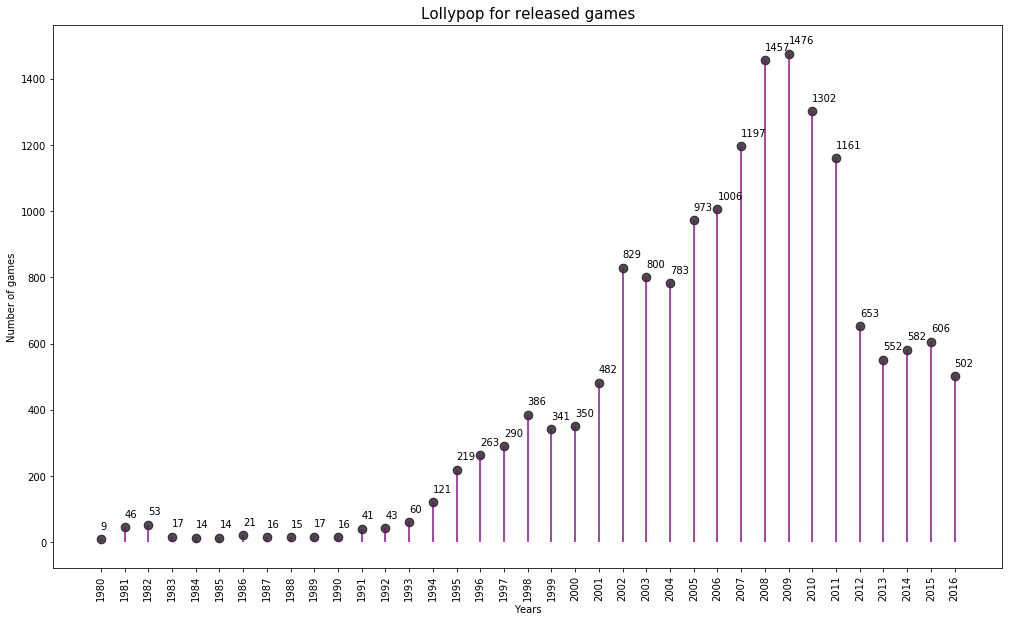

In [612]:
fig,ax= plt.subplots(figsize=(17, 10))
ax.vlines(x=game_released_per_year.year_of_release, ymin=0, ymax=game_released_per_year.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=game_released_per_year.year_of_release, y=game_released_per_year.name, s=75, color='black', alpha=0.7)

ax.set_title('Lollypop for released games', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xlabel('Years')
ax.set_xticks(game_released_per_year.year_of_release)
ax.set_xticklabels(game_released_per_year.year_of_release, rotation=90)

for row in game_released_per_year.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2))
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>Looks good, except the x-axis should be integer, but hopefully you will correct it in the previous part.</p>
</div>

We can see from the graph that as years go by, more games are released. From 1994 to 2011, there was a growth in the game release, and from 2012 there was a decrease in the game released.

Let's Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year.

In [613]:
total_slaes_per_platform = data[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
total_slaes_per_platform

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


The PS2, X360, and PS3 are the leading platforms for sales.
We can see that the variation in our data is pretty various.
Let's create a column for the Z score for every platform.

In [614]:
total_slaes_per_platform['sales_z']= (total_slaes_per_platform['total_sales']-total_slaes_per_platform['total_sales'].mean() / total_slaes_per_platform['total_sales'].std())
total_slaes_per_platform

,platform,total_sales,sales_z
0,PCFX,0.03,-0.795701
1,GG,0.04,-0.785701
2,3DO,0.10,-0.725701
3,TG16,0.16,-0.665701
4,WS,1.42,0.594299
5,NG,1.44,0.614299
6,SCD,1.86,1.034299
7,DC,15.95,15.124299
8,GEN,28.35,27.524299
9,SAT,33.59,32.764299


In the sales_z column, we can see how much each platform differs from the middle.

Let's create a green color that tells us the platforms above the middle and a red color that tells us the platforms below the middle.

In [615]:
total_slaes_per_platform['color']=['red' if x<0 else 'green' for x in total_slaes_per_platform['sales_z']]
total_slaes_per_platform

,platform,total_sales,sales_z,color
0,PCFX,0.03,-0.795701,red
1,GG,0.04,-0.785701,red
2,3DO,0.10,-0.725701,red
3,TG16,0.16,-0.665701,red
4,WS,1.42,0.594299,green
5,NG,1.44,0.614299,green
6,SCD,1.86,1.034299,green
7,DC,15.95,15.124299,green
8,GEN,28.35,27.524299,green
9,SAT,33.59,32.764299,green


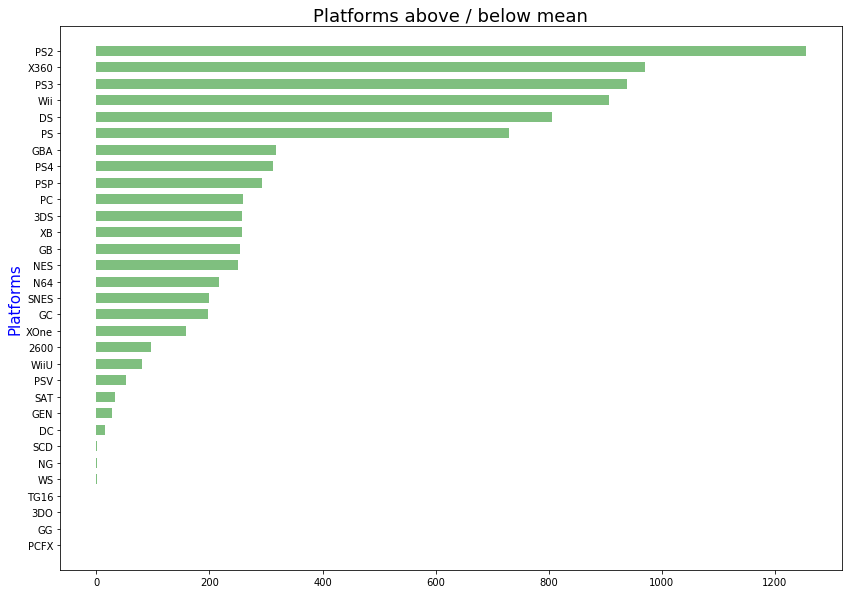

In [616]:
fig,ax= plt.subplots(figsize=(14, 10))
ax.hlines(y=total_slaes_per_platform.platform, xmax=total_slaes_per_platform.sales_z, xmin=0, color=total_slaes_per_platform.color, alpha=0.5, linewidth=10)
ax.set_title('Platforms above / below mean', fontdict={'size':18})
ax.set_ylabel('Platforms', fontsize=15, color='blue')
plt.show()

We can see that most of the platforms are above the mean.
There are four platforms below the mean, but it is hard to see their red color because the difference from the middle is minor.

Choose the platforms with the greatest total sales and build a distribution based on data for each year

The most powerful sales platforms are PS2, X360, PS3, Wii, DS, and PS. Let's build for them a distribution based on games released per year.

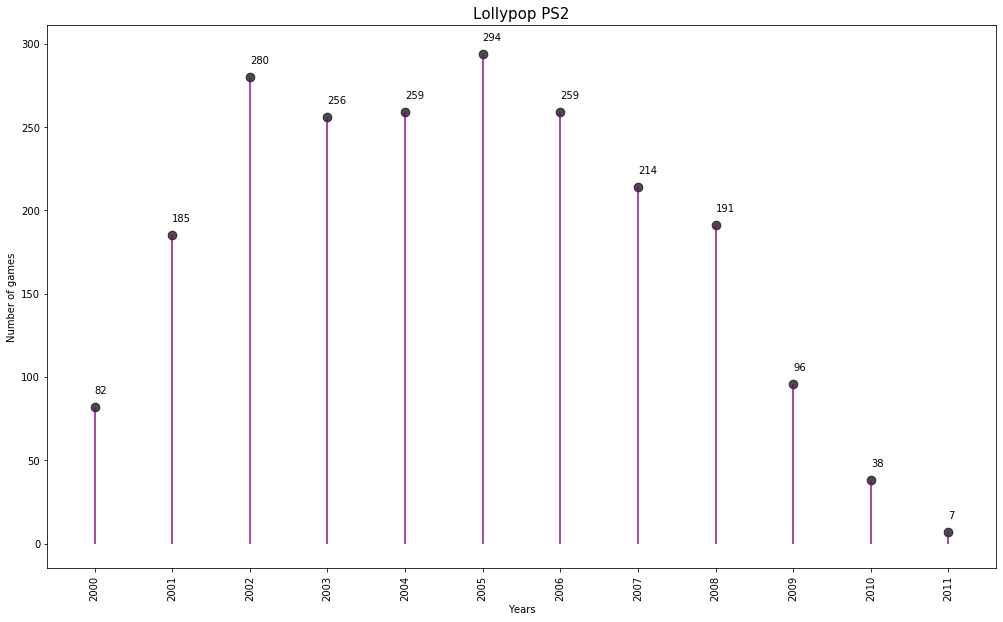

In [617]:
PS2_platform = data.query('platform == "PS2"')

PS2_released_per_year=PS2_platform[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()

fig,ax= plt.subplots(figsize=(17, 10))
ax.vlines(x=PS2_released_per_year.year_of_release, ymin=0, ymax=PS2_released_per_year.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=PS2_released_per_year.year_of_release, y=PS2_released_per_year.name, s=75, color='black', alpha=0.7)

ax.set_title('Lollypop PS2', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xlabel('Years')
ax.set_xticks(PS2_released_per_year.year_of_release)
ax.set_xticklabels(PS2_released_per_year.year_of_release, rotation=90)



for row in PS2_released_per_year.itertuples():
    ax.text(row.year_of_release, row.name+8, s=round(row.name,2))
plt.show()

In [618]:
PS2_released_per_year['name'].sum()

2161

PS2 is the leading platform in terms of sales. The emergence of this platform started in 2000, and their peak years are between 2002 and 2006.
In 2007 they slowly started to decrease in the game release.
The total number of games for this platform is 2161.

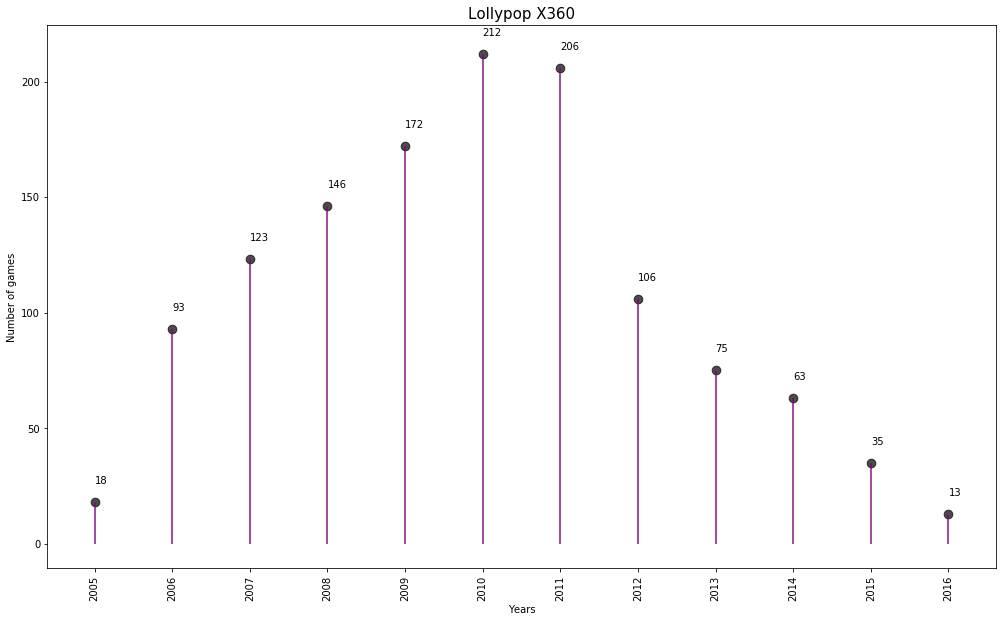

In [619]:
X360_platform = data.query('platform == "X360"')

X360_released_per_year=X360_platform[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()

fig,ax= plt.subplots(figsize=(17, 10))
ax.vlines(x=X360_released_per_year.year_of_release, ymin=0, ymax=X360_released_per_year.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=X360_released_per_year.year_of_release, y=X360_released_per_year.name, s=75, color='black', alpha=0.7)

ax.set_title('Lollypop X360', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xlabel('Years')
ax.set_xticks(X360_released_per_year.year_of_release)
ax.set_xticklabels(X360_released_per_year.year_of_release, rotation=90)

for row in X360_released_per_year.itertuples():
    ax.text(row.year_of_release, row.name+8, s=round(row.name,2))
plt.show()

In [620]:
X360_released_per_year['name'].sum()

1262

X360 started to create games in 2005, and 2010 came to its full potential.
They stayed at their peak between 2010 to 2011.
In 2013 they started to decrease in the game released. The total game release for X360 is 1262 games.


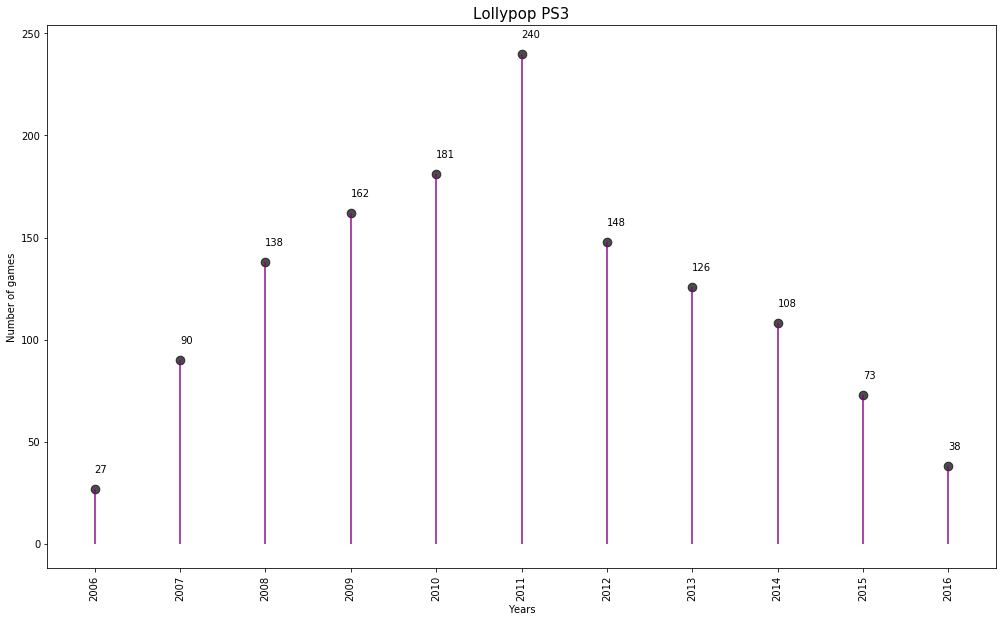

In [621]:
PS3_platform = data.query('platform == "PS3"')

PS3_released_per_year=PS3_platform[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()

fig,ax= plt.subplots(figsize=(17, 10))
ax.vlines(x=PS3_released_per_year.year_of_release, ymin=0, ymax=PS3_released_per_year.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=PS3_released_per_year.year_of_release, y=PS3_released_per_year.name, s=75, color='black', alpha=0.7)

ax.set_title('Lollypop PS3', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xlabel('Years')
ax.set_xticks(PS3_released_per_year.year_of_release)
ax.set_xticklabels(PS3_released_per_year.year_of_release, rotation=90)

for row in PS3_released_per_year.itertuples():
    ax.text(row.year_of_release, row.name+8, s=round(row.name,2))
plt.show()

In [622]:
PS3_released_per_year['name'].sum()

1331

PS3 started to release games in 2006. They peaked in 2011 with 240 games per year and then decreased in 2012. they created 1331 games over the years 2006 - 2016.

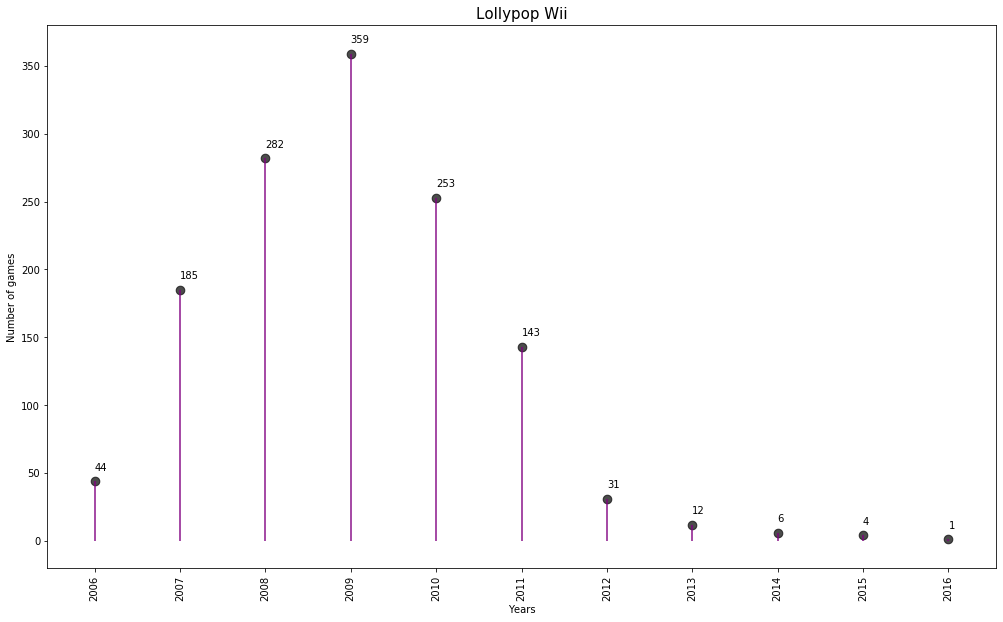

In [623]:
Wii_platform = data.query('platform == "Wii"')
Wii_released_per_year=Wii_platform[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
fig,ax= plt.subplots(figsize=(17, 10))
ax.vlines(x=Wii_released_per_year.year_of_release, ymin=0, ymax=Wii_released_per_year.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=Wii_released_per_year.year_of_release, y=Wii_released_per_year.name, s=75, color='black', alpha=0.7)

ax.set_title('Lollypop Wii', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xlabel('Years')
ax.set_xticks(Wii_released_per_year.year_of_release)
ax.set_xticklabels(Wii_released_per_year.year_of_release, rotation=90)

for row in Wii_released_per_year.itertuples():
    ax.text(row.year_of_release, row.name+8, s=round(row.name,2))
plt.show()

In [624]:
Wii_released_per_year['name'].sum()

1320

Wii started to release games in 2006.
In 2009 they were at their peak, and in 2011 they began to decrease in-game released per year. They released a total game of 1320.

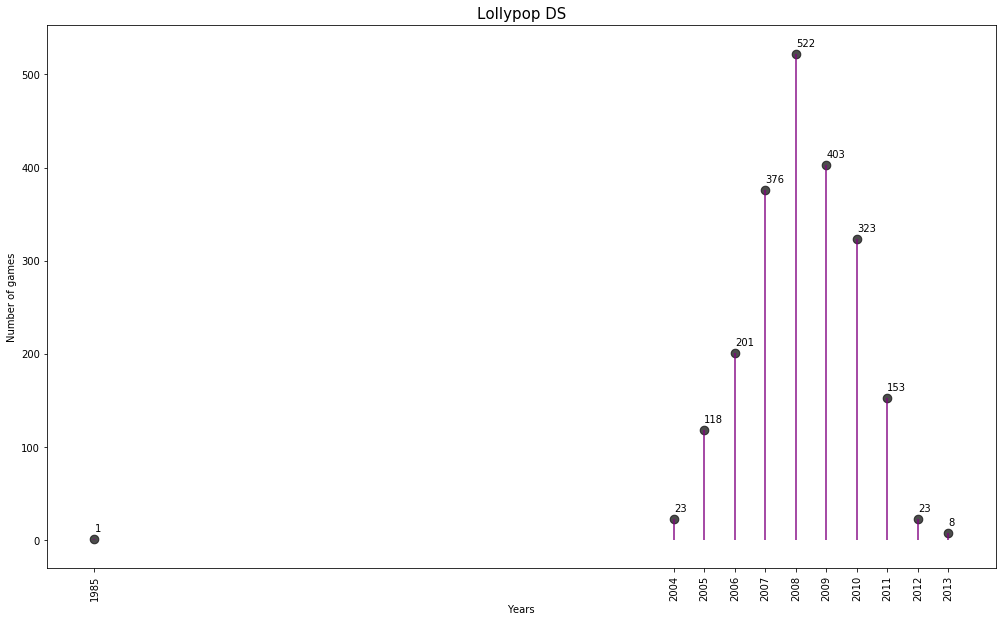

In [625]:
DS_platform = data.query('platform == "DS"')
DS_released_per_year=DS_platform[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
fig,ax= plt.subplots(figsize=(17, 10))
ax.vlines(x=DS_released_per_year.year_of_release, ymin=0, ymax=DS_released_per_year.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=DS_released_per_year.year_of_release, y=DS_released_per_year.name, s=75, color='black', alpha=0.7)

ax.set_title('Lollypop DS', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xlabel('Years')
ax.set_xticks(DS_released_per_year.year_of_release)
ax.set_xticklabels(DS_released_per_year.year_of_release, rotation=90)

for row in DS_released_per_year.itertuples():
    ax.text(row.year_of_release, row.name+8, s=round(row.name,2))
plt.show()

In [626]:
DS_released_per_year['name'].sum()

2151

DS began to release games in 2004. they had a 1-year peak in 2008 and then decreased in 2009. they have a total game release of 2151 games.

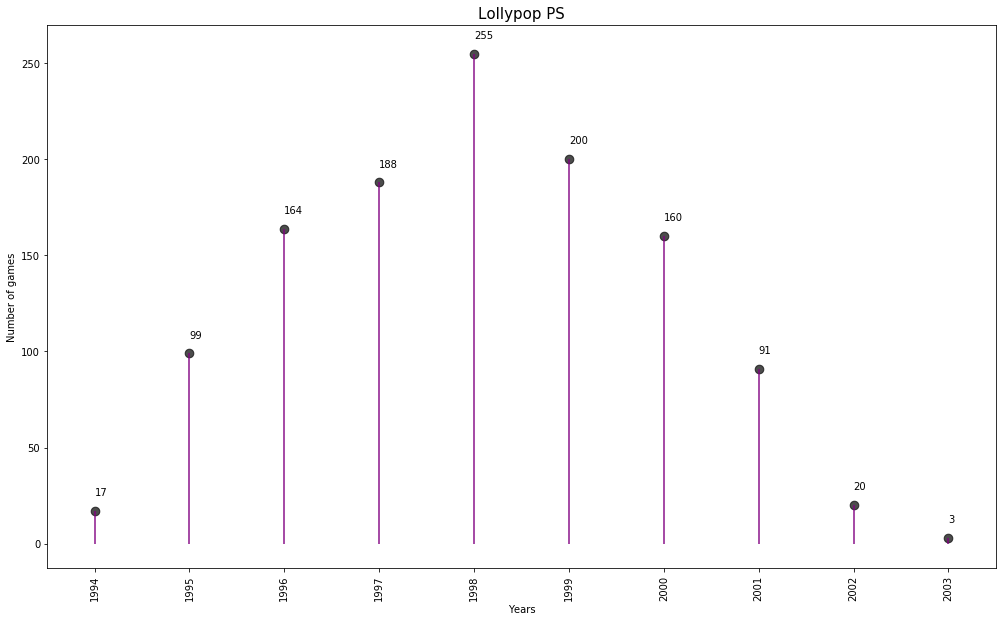

In [627]:
PS_platform = data.query('platform == "PS"')
PS_released_per_year=PS_platform[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
fig,ax= plt.subplots(figsize=(17, 10))
ax.vlines(x=PS_released_per_year.year_of_release, ymin=0, ymax=PS_released_per_year.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=PS_released_per_year.year_of_release, y=PS_released_per_year.name, s=75, color='black', alpha=0.7)

ax.set_title('Lollypop PS', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xlabel('Years')
ax.set_xticks(PS_released_per_year.year_of_release)
ax.set_xticklabels(PS_released_per_year.year_of_release, rotation=90)

for row in PS_released_per_year.itertuples():
    ax.text(row.year_of_release, row.name+8, s=round(row.name,2))
plt.show()

In [628]:
PS_released_per_year['name'].sum()

1197

PS started to release games in 1994 they reach their peak in 1998 and then decreased from 1999 to 2003.
They released a total of 1197 games.

Let's Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

Let's create a pivot table for the total sales of each platform each year.

In [629]:
platform_sales_per_year = pd.pivot_table(data, index= 'year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
platform_sales_per_year.tail()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2012,0.0,0.0,51.36,0.0,11.01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.71,17.56,99.74,0.0,0.00
2013,0.0,0.0,57.76,0.0,1.54,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.59,21.65,88.58,0.0,18.96
2014,0.0,0.0,43.76,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.75,22.03,34.74,0.0,54.07
2015,0.0,0.0,27.78,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.14,16.35,11.96,0.0,60.14
2016,0.0,0.0,15.14,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.18,4.60,1.52,0.0,26.15


In [630]:
dynamics_0=(platform_sales_per_year-platform_sales_per_year.shift(+1)).T
dynamics_0

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,NaN,24.3,3.7,-33.54,-5.57,0.18,0.22,1.27,-1.20,-0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,63.20,-11.84,6.40,-14.00,-15.98,-12.64
DC,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.02,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,NaN,0.0,0.0,0.00,0.00,0.02,-0.02,0.00,0.00,0.00,...,27.13,1.71,-29.11,-34.52,-58.84,-15.17,-9.47,-1.54,0.00,0.00
GB,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.43,63.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.88,-3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-10.99,-0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


It is tough to read a pivot table like this. Let's create a heatmap to show the emerging and decrease of each platform in terms of sales.

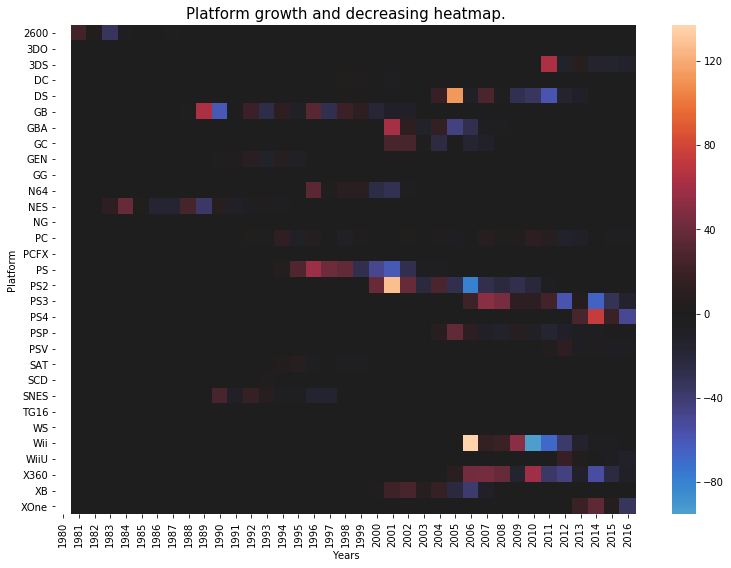

In [631]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics_0, center=0)
plt.title('Platform growth and decreasing heatmap.', fontdict={'size':15})
plt.ylabel('Platform')
plt.xlabel('Years')
plt.show()

We see that, in general, its take 3-4 year for a platform to emerge and fade away.

Let't Determine what period you should take data for

In [632]:
new_data=data[data.year_of_release>=2012]
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.0,N/A,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,64.0,6.3,N/A,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,N/A,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,71.0,7.5,N/A,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,N/A,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,N/A,0.01


Let's determine Which platforms are leading in sales? Which ones are growing or shrinking? And we will Select several potentially profitable platforms.

In [633]:
leading_sales = pd.pivot_table(new_data, index= 'year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
leading_sales.tail()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,57.76,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [634]:
dynamics=(leading_sales-leading_sales.shift(+1)).T
dynamics

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,NaN,6.40,-14.00,-15.98,-12.64
DS,NaN,-9.47,-1.54,0.00,0.00
PC,NaN,-10.84,0.90,-4.76,-3.27
PS3,NaN,5.89,-65.49,-30.94,-13.22
PS4,NaN,25.99,74.01,18.90,-49.65
PSP,NaN,-4.55,-2.90,-0.12,-0.12
PSV,NaN,-5.60,1.57,-5.91,-2.00
Wii,NaN,-13.12,-4.84,-2.61,-0.96
WiiU,NaN,4.09,0.38,-5.68,-11.75


We will use the exact heatmap visualization for this.

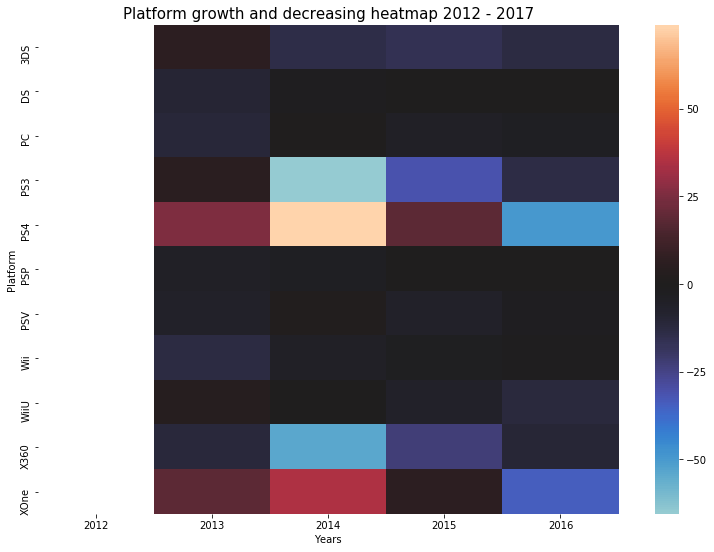

In [635]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics, center=0)
plt.title('Platform growth and decreasing heatmap 2012 - 2017', fontdict={'size':15})
plt.ylabel('Platform')
plt.xlabel('Years')
plt.show()

In this visualization, we see which platform is growing and decreasing.


- For example, ps3 dropped in 2013 but slowly increased in 2016.
- 3ds are decreasing slowly.
- x360 decrease in 2130 - 2014 then increases in 2015 - 2016.
- XOne had good years in 2013  - 2014 but decreased in 2015 - 2016.


Generally, most platforms are decreasing, but we will consider those mentioned above as the successful platform of 2013 - 2017.

In [636]:
new_data = data.loc[data['platform'].isin(['XOne', 'X360', 'PS3', 'PS4', '3DS'])]
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.0,N/A,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,64.0,6.3,N/A,0.01
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,61.5,-1.0,T,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,N/A,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,N/A,0.01


Let's Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [637]:
grouped = new_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
grouped

,platform,year_of_release,total_sales
26,X360,2010,180.21
11,PS3,2011,165.09
27,X360,2011,143.84
10,PS3,2010,142.17
24,X360,2008,135.26
9,PS3,2009,130.93
25,X360,2009,120.29
19,PS4,2015,118.90
8,PS3,2008,118.52
13,PS3,2013,113.25


In [638]:
order= new_data['platform']

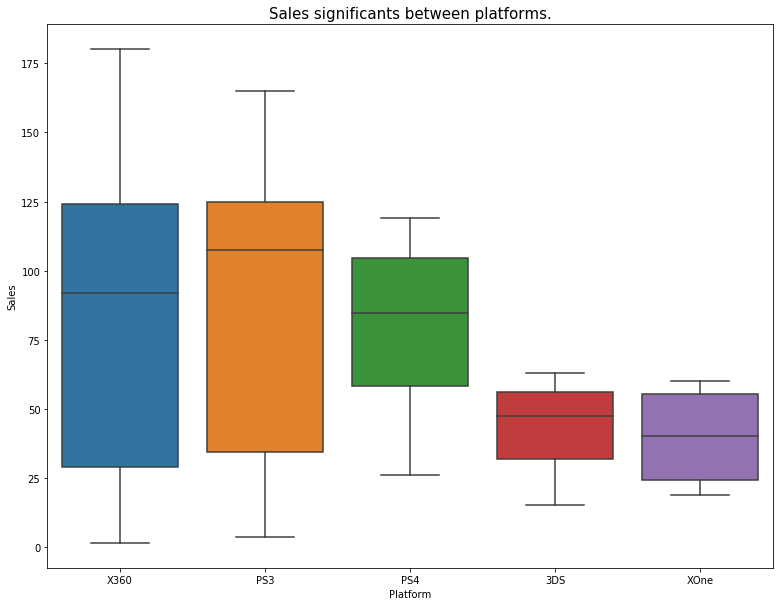

In [639]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=grouped)
plt.title('Sales significants between platforms.', fontdict={'size':15})
plt.ylabel('Sales')
plt.xlabel('Platform')
plt.show()

The difference in sales on the leading platform is significant.
We can see that x360, ps3 got way more sales than 3ds, ps4 and xone.
The mean in x360, ps3, ps4 is less significant but also various.
3ds and XOne mean is also less significant but various.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [640]:
total_game_per_genre = new_data[['genre', 'name']].groupby(['genre']).count().sort_values(by='name', ascending=True).reset_index()
total_game_per_genre

,genre,name
0,Puzzle,31
1,Strategy,76
2,Platform,107
3,Simulation,112
4,Fighting,180
5,Adventure,202
6,Racing,246
7,Misc,345
8,Role-Playing,347
9,Shooter,445


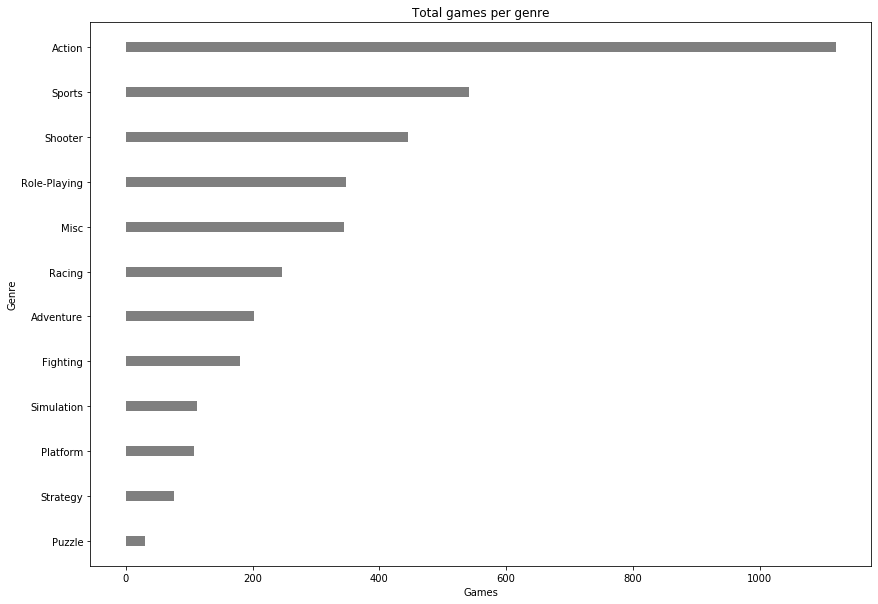

In [641]:
plt.figure(figsize=(14, 10))
plt.hlines(y=total_game_per_genre.genre, xmax=total_game_per_genre.name, xmin=0, alpha=0.5, linewidth=10)
plt.title('Total games per genre')
plt.xlabel('Games')
plt.ylabel('Genre')
plt.show()

If we look at the number of games per genre, the leading genre is Action, Sport, and Shooter.

In [642]:
sales_by_genre = new_data[['genre', 'total_sales']].groupby(['genre']).sum().sort_values(by='total_sales', ascending=True).reset_index()


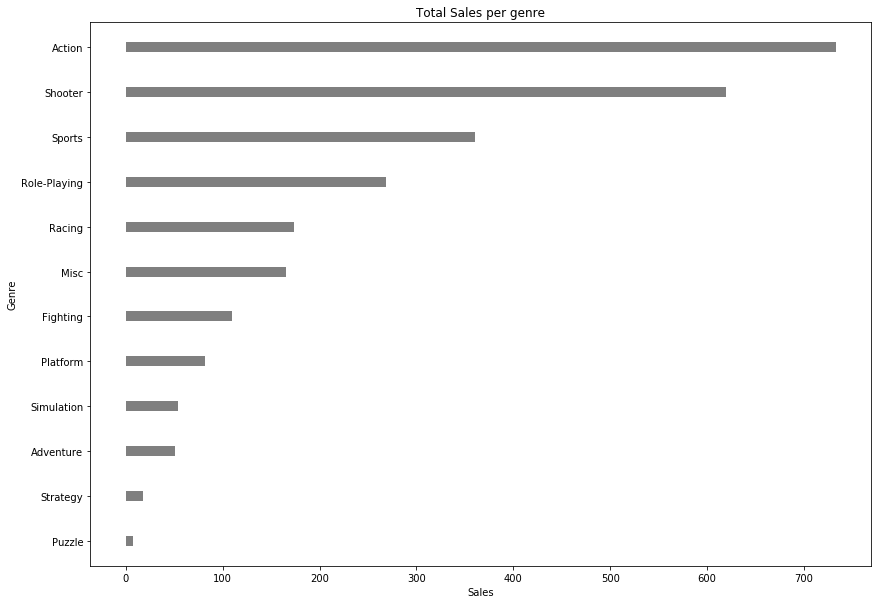

In [643]:
plt.figure(figsize=(14, 10))
plt.hlines(y=sales_by_genre.genre, xmax=sales_by_genre.total_sales, xmin=0, alpha=0.5, linewidth=10)
plt.title('Total Sales per genre')
plt.xlabel('Sales')
plt.ylabel('Genre')
plt.show()

Looking at the top genres in terms of sales, we have Action, Shooter, and Sport at the top.

We see a correlation between the number of games and the total sales, but we have some surprises here.
For example, the Sports Genre generated more games than the shooter, but the shooter genre outperformed the sports genre in terms of sales.

# Step 4. Create a user profile for each region


For each region (NA, EU, JP), determine The top five platforms. Then, describe variations in their market shares from region to region.

In [644]:
top_5_na = new_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
top_5_na

,platform,na_sales
3,X360,602.47
1,PS3,393.49
2,PS4,108.74
4,XOne,93.12
0,3DS,83.49


In [645]:
top_5_na['na_sales'].sum()

1281.3100000000002

The five dominant platforms in north America are  X360, PS3, PS4, XOne, 3DS. with a total of 1.281 billion.

In [646]:
top_5_eu =  new_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
top_5_eu

,platform,eu_sales
1,PS3,330.29
3,X360,270.76
2,PS4,141.09
0,3DS,61.48
4,XOne,51.59


In [647]:
top_5_eu['eu_sales'].sum()

855.21

The five dominant platforms in Europe are  PS3, X360, PS4, Wii, 3DS. with a total sales of 855 million.

In [648]:
top_5_jp = new_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
top_5_jp

,platform,jp_sales
0,3DS,100.67
1,PS3,80.19
2,PS4,15.96
3,X360,12.43
4,XOne,0.34


In [649]:
top_5_jp['jp_sales'].sum()

209.59000000000003

The five dominant platforms in Japan are  3DS, PS3, PS4, X360, XOne, with a total sales of 209 million.

We can see pretty much the same platform dominate in those markets.

For each region (NA, EU, JP), determine The top five genres. Explain the difference.

In [650]:
new_data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.0,4.89,0.24,1.69,61.0,6.3,E,21.82


In [651]:
top_5_na_gn = new_data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
top_5_na_gn

,genre,na_sales
0,Action,337.13
8,Shooter,326.72
10,Sports,187.96
7,Role-Playing,113.93
3,Misc,96.94


In [652]:
top_5_eu_gn = new_data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
top_5_eu_gn

,genre,eu_sales
0,Action,247.72
8,Shooter,204.53
10,Sports,119.87
6,Racing,74.62
7,Role-Playing,66.61


In [653]:
top_5_jp_gn = new_data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
top_5_jp_gn

,genre,jp_sales
7,Role-Playing,65.01
0,Action,61.03
8,Shooter,15.08
9,Simulation,12.54
2,Fighting,11.50


North America and Europe-dominated genres are almost the same. Still, the 4th dominant genre in NA is "Role-Playing," and in EU is "Racing." if we look at JP, the most dominant genre is "Role-Playing."
Action and Shooter came second and third; wail Fighting closed the top five.

Ratings are determined by the Entertainment Software Rating Board (ESRB). The ESRB is a self-regulatory body that independently applies and enforces ratings, advertising guidelines, and online privacy principles adopted by the industry.

Do ESRB ratings affect sales in individual regions?

In [654]:
rating_sales_na = new_data.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales', ascending=False).head()
rating_sales_na

,rating,na_sales
2,M,0.727155
0,E,0.387180
4,T,0.301209
1,E10+,0.276615
3,N/A,0.116932


In [655]:
rating_sales_eu = new_data.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales', ascending=False).head()
rating_sales_eu

,rating,eu_sales
2,M,0.476388
0,E,0.273513
4,T,0.170153
1,E10+,0.159077
3,N/A,0.110083


In [656]:
rating_sales_jp = new_data.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales', ascending=False).head()
rating_sales_jp

,rating,jp_sales
3,N/A,0.088082
2,M,0.052036
0,E,0.048891
4,T,0.045915
1,E10+,0.014044


Suppose we look at the avg. Sales per Rating in NA and EU it is identical. But in JP, the Rating does affect the avg sales, and we see "N/A" at the 1st place, "M" at the 2nd place, "E" at the 3rd, and "T" at the 4th.

# Step 5. Test the following hypotheses:


H0: The null hypothesis in the first question is that Average user ratings of the Xbox One and PC platforms differ.

H1:The alternative hypothesis is that The Average user ratings of the Xbox One and PC platforms are the same.

Let's create two variables: one that slices the user_score of the Xbox one and the PC.

In [657]:
Xbox_rating = data.query('platform == "XOne"')['user_score']
Xbox_rating = pd.DataFrame(Xbox_rating)
Xbox_rating.head()

,user_score
99,6.6
165,7.9
179,5.4
242,6.4
270,6.2


In [658]:
Xbox_rating.stb.missing()

,missing,total,percent
user_score,0,247,0.0


In [659]:
Xbox_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  247 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [660]:
pc_rating = data.query('platform == "PC"')['user_score']
pc_rating = pd.DataFrame(pc_rating)
pc_rating.head()

,user_score
85,7.6
138,7.3
192,4.0
195,7.4
218,8.2


In [661]:
pc_rating.stb.missing()

,missing,total,percent
user_score,0,974,0.0


In [662]:
pc_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 85 to 16705
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  974 non-null    float64
dtypes: float64(1)
memory usage: 15.2 KB


In [663]:
Xbox_rating = Xbox_rating['user_score']

In [664]:
pc_rating = pc_rating['user_score']

Let's use the Levene library to find if the variance is equal between the two samples or not.

We will need to choose a significant level to be the threshold that determines when we will reject the null hypothesis. Our significant level will be 0.05 percent.

In [665]:
from scipy.stats import levene

In [666]:
levene(Xbox_rating, pc_rating, center='mean')

LeveneResult(statistic=6.687504632942618, pvalue=0.009824227908481939)

pvalue=0.009 is below 0.05, we will consider the variances not equal.

Now let's do an independent t-test with the two variables and the equal_var=True because of the Levene test results.

In [667]:
from scipy.stats import ttest_ind

In [668]:
alpha = 0.05 # set a critical statistical significance level

results = ttest_ind(Xbox_rating, pc_rating, equal_var=False) # test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)# print the p-value you get

if results.pvalue < alpha: #compare the p-value you get with the significance level:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0004355853543232719
We reject the null hypothesis


We reject the null hypothesis, which means that The Average user ratings of the Xbox One and PC platforms are the same.

H0: The null hypothesis in the second question is that Average user ratings for the Action and Sports genres are not different.

H1:The alternative hypothesis is that The Average user ratings for the Action and Sports genres are different.

Let's create two variables that slice the user_score of the Action and the Sports genre.

In [669]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-2.0,-2.0,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-2.0,-2.0,N/A,31.38


In [670]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [671]:
action_rating = data.query("genre == 'Action'")['user_score']
action_rating = pd.DataFrame(action_rating)
action_rating.head()

,user_score
16,8.2
17,9.0
23,8.1
24,8.7
38,8.5


In [672]:
action_rating.stb.missing()

,missing,total,percent
user_score,0,3369,0.0


In [673]:
action_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369 entries, 16 to 16710
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  3369 non-null   float64
dtypes: float64(1)
memory usage: 52.6 KB


In [674]:
action_rating = action_rating['user_score']

In [675]:
sport_rating = data.query("genre == 'Sports'")['user_score']
sport_rating = pd.DataFrame(sport_rating)
sport_rating.head()

,user_score
0,8.0
3,8.0
13,7.7
15,7.4
77,4.3


In [676]:
sport_rating.stb.missing()

,missing,total,percent
user_score,0,2348,0.0


In [677]:
sport_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 16711
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  2348 non-null   float64
dtypes: float64(1)
memory usage: 36.7 KB


In [678]:
sport_rating = sport_rating['user_score']

Our significant level will be 0.05 percent.

In [679]:
from scipy.stats import levene

In [680]:
levene(action_rating, sport_rating, center='mean')

LeveneResult(statistic=168.79303902665401, pvalue=4.6766354399412925e-38)

pvalue=4.676 is above 0.05, we will consider the variances equal.

Now let's do an independent t-test with the two variables and the equal_var=True because of the Levene test results.

In [681]:
alpha = 0.05 # set a critical statistical significance level

results = ttest_ind(action_rating, sport_rating, equal_var=True) # test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)# print the p-value you get

if results.pvalue < alpha: #compare the p-value you get with the significance level:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 4.733376390750224e-14
We reject the null hypothesis


We reject the null hypothesis This means that we reject the possibility that the Average user ratings for the Action and Sports genres are the same.

# Step 6. Write a general conclusion


We have come a long way since we started the investigation.

1) Open the data file and study the general information

We began by studying the data, and from this phase, we gathered valuable information:

- The most common game in our data is "Need for Speed: Most Wanted." We can use this information to create content and target gamers' audiance.


- the most common platform in the data is "PS2."


- The most common genre is "Action."


- ps2 and DS are the most used platforms.


- The most popular genre are Action, Sports, and Misc.


- For North American sales, the top games are Wii Sports, Super Mario Bros, Duck Hunt, Tetris, and Mario Kart Wii. This information is crucial to connect the market of North America.


- For Europe sales, the top games are Wii Sports, Mario Kart Wii, Nintendogs, Wii Sports Resort, Brain Age: Train Your Brain in Minutes a Day. This information is crucial to connect the market of Europe.


- The top games for Japan by sales are Pokemon Red/Pokemon Blue, Pokemon Gold/Pokemon Silver, Super Mario Bros., New Super Mario Bros., Pokemon Diamond/Pokemon Pearl.

2) Prepare the data

After we learned the general data and gathered essential information, we cleaned the data.

3) Analyze the data

After cleaning the data, we start analyzing and learning more about our data.
We analyze the data and gather the following insights:


- From 1994 to 2011, there was a growth in the game release, and from 2012 there was a decrease in the game released. 


- The PS2, X360, and PS3 are the leading platforms for sales.


- We find that, in general, its take 3-4 year for a platform to emerge and fade away.


- We choose a successful platform: XOne, X360, PS3, PS4, 3DS.


- If we look at the number of games per genre, the leading genre is Action, Sport, and Shooter.


- Looking at the top genres in terms of sales, we have Action, Shooter, and Sport at the top.

- We see a correlation between the number of games and the total sales, but we have some surprises here. For example, the Sports Genre generated more games than the Shooter, but the shooter genre outperformed the sports genre in terms of sales.

4) Create a user profile for each region

- The five dominant platforms in north America are X360, PS3, PS4, XOne, 3DS., with a total of 1.281 billion.


- The five dominant platforms in Europe are  PS3, X360, PS4, Wii, 3DS., with a total sales of 855 million.


- The five dominant platforms in Japan are  3DS, PS3, PS4, X360, XOne, with a total sales of 209 million.


- North America and Europe-dominated genres are almost the same. Still, the 4th dominant genre in NA is "Role-Playing," and in EU is "Racing." if we look at JP, the most dominant genre is "Role-Playing." Action and Shooter came second and third; wail Fighting closed the top five.


5) Test hypotheses

- After analyzing the data, we hypothesize that Average user ratings of the Xbox One and PC platforms are the same.


- We check the hypothesis with our data and find enough confidence to say that the belief is true.


- We also hypothesized that Average user ratings for the Action and Sports genres are different. Again, we check our data and find enough confidence to say that the belief is true.
